In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
import statsmodels.api as sm
warnings.filterwarnings("ignore")
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
dataset = pd.read_csv('/kaggle/input/1000-imdb-xgboost/thousIMDB-Dataset.csv')
dataset.head(3)

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0


In [3]:
# Extract the first value of each cell in the genre column
dataset['Genre'] = dataset['Genre'].apply(lambda x: x.split(',')[0])



# **Exploratory Data Analysis**

In [4]:
dataset.shape

(1000, 12)

In [5]:
# rearrange the data in descending order by the year column
dataset=dataset.sort_values(by='Year' , ascending=True)
dataset.columns


Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 773 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Title               1000 non-null   object 
 2   Genre               1000 non-null   object 
 3   Description         1000 non-null   object 
 4   Director            1000 non-null   object 
 5   Actors              1000 non-null   object 
 6   Year                1000 non-null   int64  
 7   Runtime (Minutes)   1000 non-null   int64  
 8   Rating              1000 non-null   float64
 9   Votes               1000 non-null   int64  
 10  Revenue (Millions)  872 non-null    float64
 11  Metascore           936 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 101.6+ KB


# Let's see the numerical features only

In [7]:
Num_features=list(dataset.select_dtypes(include=['float64','int64']).columns)
Num_features

['Rank',
 'Year',
 'Runtime (Minutes)',
 'Rating',
 'Votes',
 'Revenue (Millions)',
 'Metascore']

# Let's see the categorical features only

In [8]:
cat_features=list((dataset.select_dtypes(exclude=['float64','int64']).columns))
cat_features

['Title', 'Genre', 'Description', 'Director', 'Actors']

# Convert the Year col from int64 to object

In [9]:
dataset = dataset.astype({'Year':'object'})
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 773 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Title               1000 non-null   object 
 2   Genre               1000 non-null   object 
 3   Description         1000 non-null   object 
 4   Director            1000 non-null   object 
 5   Actors              1000 non-null   object 
 6   Year                1000 non-null   object 
 7   Runtime (Minutes)   1000 non-null   int64  
 8   Rating              1000 non-null   float64
 9   Votes               1000 non-null   int64  
 10  Revenue (Millions)  872 non-null    float64
 11  Metascore           936 non-null    float64
dtypes: float64(3), int64(3), object(6)
memory usage: 101.6+ KB


# New column(Rating_Category)

In [10]:
dataset['Rating_Category']=dataset['Rating'].apply(lambda Rating :'Good' if Rating >= 8.0 else 'Bad')
dataset.head(3)

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,Rating_Category
773,774,Lady in the Water,Drama,Apartment building superintendent Cleveland He...,M. Night Shyamalan,"Paul Giamatti, Bryce Dallas Howard, Jeffrey Wr...",2006,110,5.6,82701,42.27,36.0,Bad
445,446,Silent Hill,Adventure,"A woman, Rose, goes in search for her adopted ...",Christophe Gans,"Radha Mitchell, Laurie Holden, Sean Bean,Debor...",2006,125,6.6,184152,46.98,NaN,Bad
99,100,The Departed,Crime,An undercover cop and a mole in the police att...,Martin Scorsese,"Leonardo DiCaprio, Matt Damon, Jack Nicholson,...",2006,151,8.5,937414,132.37,85.0,Good


# Describe The dataset

In [11]:
dataset.describe()

,Rank,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
count,1000.000000,1000.000000,1000.000000,1.000000e+03,872.000000,936.000000
mean,500.500000,113.172000,6.723200,1.698083e+05,82.956376,58.985043
std,288.819436,18.810908,0.945429,1.887626e+05,103.253540,17.194757
min,1.000000,66.000000,1.900000,6.100000e+01,0.000000,11.000000
25%,250.750000,100.000000,6.200000,3.630900e+04,13.270000,47.000000
50%,500.500000,111.000000,6.800000,1.107990e+05,47.985000,59.500000
75%,750.250000,123.000000,7.400000,2.399098e+05,113.715000,72.000000
max,1000.000000,191.000000,9.000000,1.791916e+06,936.630000,100.000000


# Check the correlation

In [12]:
dataset.corr()

,Rank,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
Rank,1.000000,-0.221739,-0.219555,-0.283876,-0.271592,-0.191869
Runtime (Minutes),-0.221739,1.000000,0.392214,0.407062,0.267953,0.211978
Rating,-0.219555,0.392214,1.000000,0.511537,0.217654,0.631897
Votes,-0.283876,0.407062,0.511537,1.000000,0.639661,0.325684
Revenue (Millions),-0.271592,0.267953,0.217654,0.639661,1.000000,0.142397
Metascore,-0.191869,0.211978,0.631897,0.325684,0.142397,1.000000


# Heatmap of the correlation matrix 

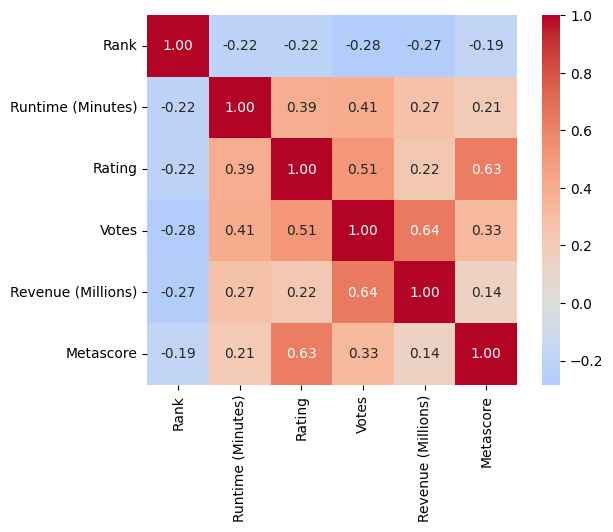

In [13]:
corr = dataset.corr()
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt='.2f', center=0, square=True)
plt.show()

# Barplot

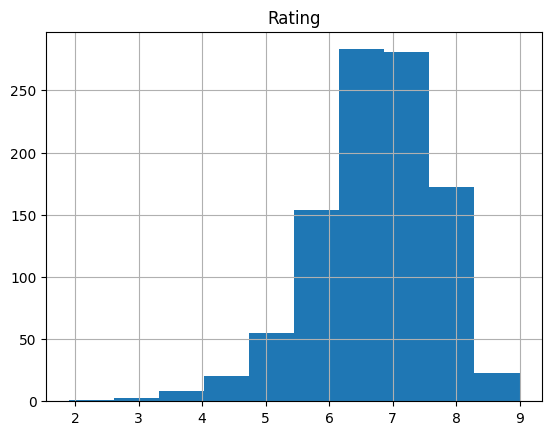

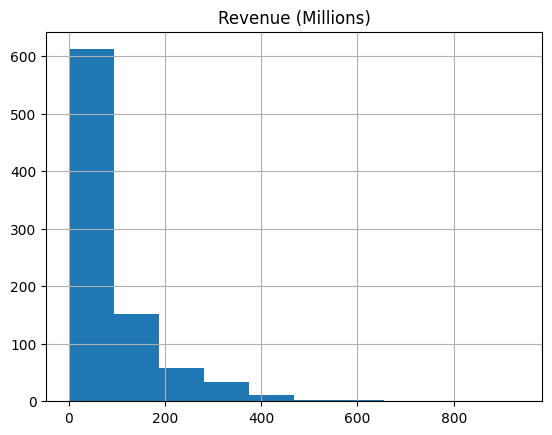

In [14]:
for col  in ['Rating' ,'Revenue (Millions)'] :
    dataset[col].hist()
    plt.title(col)
    plt.show()

# Groupby('Year')


In [15]:
grouped = dataset.groupby('Year').sum()
grouped

,Rank,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
Year,,,,,,
2006,25894,5317,313.5,11848758,3624.46,2641.0
2007,30559,6446,378.1,12949545,4306.23,2967.0
2008,32533,5763,352.8,14326280,5053.22,2813.0
2009,29928,5922,355.0,13044813,5292.26,2799.0
2010,35239,6668,409.6,15166939,5989.65,3504.0
2011,37143,7220,430.8,15169789,5431.96,3580.0
2012,34104,7623,443.2,18254470,6910.29,3791.0
2013,50617,10562,619.9,19933518,7666.72,5034.0
2014,50272,11220,670.1,19985162,7997.40,5445.0


# Rating and Runtime(Minutes) ,By Rating_Category 

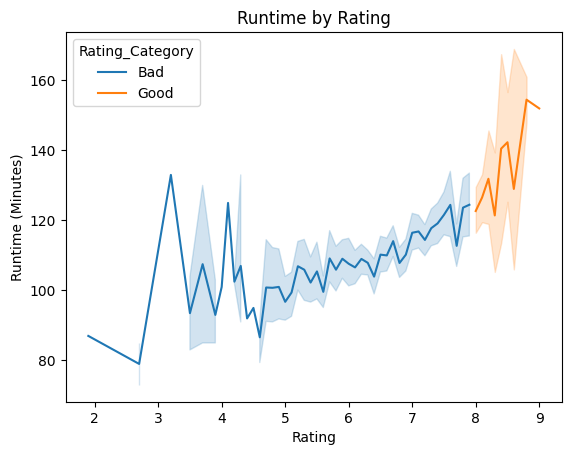

In [16]:
sns.lineplot(x='Rating', y='Runtime (Minutes)', data=dataset, hue='Rating_Category')
plt.title('Runtime by Rating')
plt.show()

# Rating and Runtime(Minutes) ,By Rating_Category 

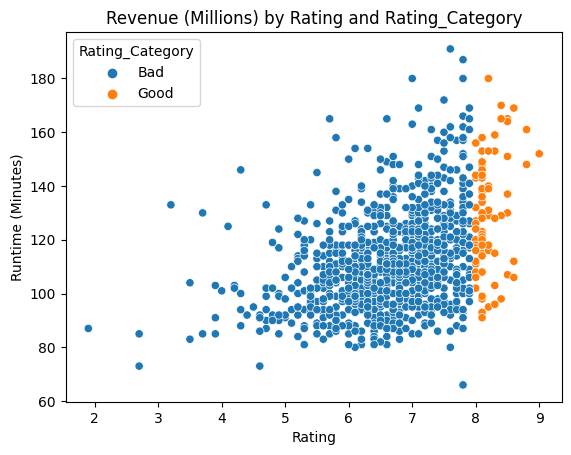

In [17]:
# create a scatter plot with a light color palette
sns.scatterplot(x='Rating', y='Runtime (Minutes)', data=dataset , hue='Rating_Category')
plt.title('Revenue (Millions) by Rating and Rating_Category')

plt.show()

# Revenue and Runtime(Minutes) ,By Year 

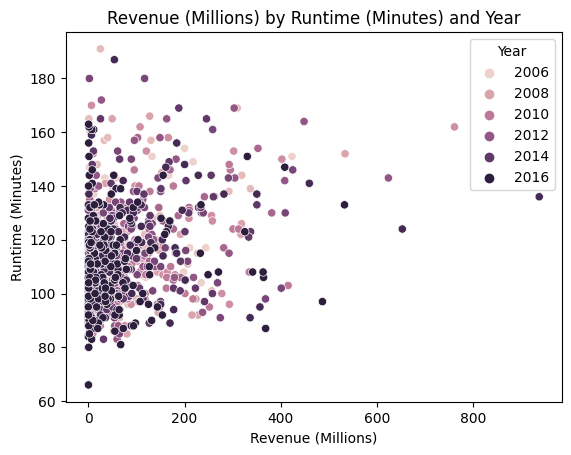

In [18]:
# create a scatter plot with a light color palette
sns.scatterplot(x='Revenue (Millions)', y='Runtime (Minutes)', data=dataset , hue='Year')
plt.title('Revenue (Millions) by Runtime (Minutes) and Year')
plt.show()

# Revenue (Millions) according to the Year

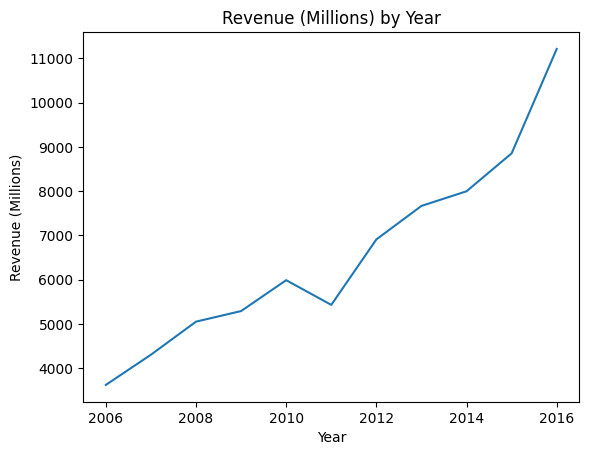

In [19]:
sns.lineplot(x='Year' ,y='Revenue (Millions)', data=grouped)
plt.title('Revenue (Millions) by Year')
plt.show()

# What are the most used words in the Description for Action Genre

In [20]:
Desc_col=dataset[dataset['Genre']=='Action']
Desc_col['Description']

308    A teenager becomes a major competitor in the w...
78     Jack Sparrow races to recover the heart of Dav...
924    Superman reappears after a long absence, but i...
901    An FBI agent takes on a plane full of deadly a...
935    #1 NASCAR driver Ricky Bobby stays atop the he...
                             ...                        
288    A guard at an armored car company in the South...
290    While a zombie virus breaks out in South Korea...
264    After facing Shredder, who has joined forces w...
234    Eric and fellow warrior Sara, raised as member...
741    The legendary Roberto Duran and his equally le...
Name: Description, Length: 293, dtype: object

# The most Common Words in the Description for Action Genre

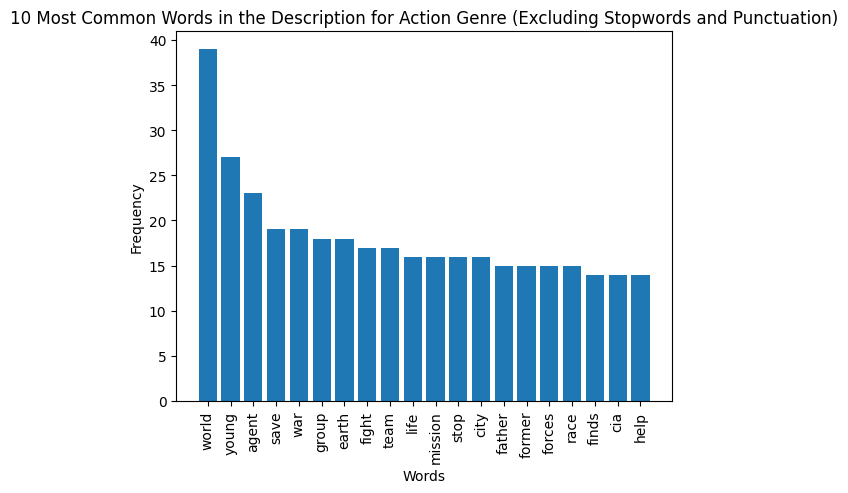

In [21]:

stop_words = set(stopwords.words('english'))
new_stopwords = ["'s",'must','one','man','new','put' ,'bio','eX','part','two','back']

stop_words.update(new_stopwords)

Desc_col['Description'] = [line.lower() for line in Desc_col['Description']]
count = Counter()
for line in Desc_col['Description']:
    tokens = word_tokenize(line)
    good_words = [token for token in tokens if token not in stop_words and token not in string.punctuation]  
    count.update(good_words)
# create a list of the 20 most common words
top_words = count.most_common(20)
# create a bar chart of the top 20 most common words
words = [word[0] for word in top_words]
counts = [count[1] for count in top_words]
plt.bar(words, counts)
plt.xticks(rotation=90)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('10 Most Common Words in the Description for Action Genre (Excluding Stopwords and Punctuation)')
plt.show()


# World cloud for the Most Common Words in the Description for Action Genre

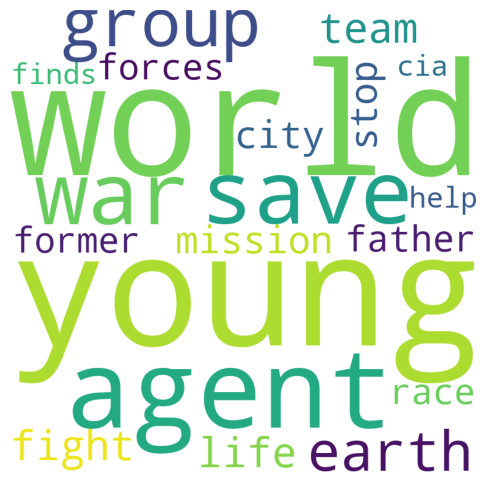

In [22]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all cleaned text into a single string
cleaned_text = " ".join(words)

# Generate a word cloud
wordcloud = WordCloud(width = 800, height = 800, background_color ='white', min_font_size = 10).generate(cleaned_text)

# Plot the word cloud
plt.figure(figsize = (5, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 1)
  
# Show the plot
plt.show()


# Data preprocessing

# Handling missing values 

In [23]:
dataset.isnull().sum()

Rank                    0
Title                   0
Genre                   0
Description             0
Director                0
Actors                  0
Year                    0
Runtime (Minutes)       0
Rating                  0
Votes                   0
Revenue (Millions)    128
Metascore              64
Rating_Category         0
dtype: int64

In [24]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(dataset[['Revenue (Millions)','Metascore']])
dataset[['Revenue (Millions)','Metascore']]=imputer.transform(dataset[['Revenue (Millions)','Metascore']])

In [25]:
dataset.isnull().sum()

Rank                  0
Title                 0
Genre                 0
Description           0
Director              0
Actors                0
Year                  0
Runtime (Minutes)     0
Rating                0
Votes                 0
Revenue (Millions)    0
Metascore             0
Rating_Category       0
dtype: int64

# Drop_duplicates

In [26]:
dataset=dataset.drop_duplicates(subset=['Title'])
duplicate_titles = dataset[dataset["Title"].duplicated(keep=False)]["Title"]
# Print the duplicate titles
print("Duplicate Titles:")
print(duplicate_titles)

Duplicate Titles:
Series([], Name: Title, dtype: object)


# Drop columns

In [27]:
dataset=dataset.drop(['Rank' , 'Title' ,'Description','Actors'] , axis=1)
dataset

,Genre,Director,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,Rating_Category
773,Drama,M. Night Shyamalan,2006,110,5.6,82701,42.27,36.000000,Bad
445,Adventure,Christophe Gans,2006,125,6.6,184152,46.98,58.985043,Bad
99,Crime,Martin Scorsese,2006,151,8.5,937414,132.37,85.000000,Good
550,Comedy,Peyton Reed,2006,106,5.8,106381,118.68,45.000000,Bad
885,Drama,Alejandro González Iñárritu,2006,143,7.5,253417,34.30,69.000000,Bad
...,...,...,...,...,...,...,...,...,...
247,Comedy,Mike Mills,2016,119,7.4,14708,5.66,83.000000,Bad
250,Comedy,Eleanor Coppola,2016,92,4.9,178,0.32,50.000000,Bad
258,Horror,David F. Sandberg,2016,81,6.4,69823,67.24,58.000000,Bad
237,Drama,D.J. Caruso,2016,85,3.9,4895,2.41,31.000000,Bad


In [28]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 999 entries, 773 to 999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Genre               999 non-null    object 
 1   Director            999 non-null    object 
 2   Year                999 non-null    object 
 3   Runtime (Minutes)   999 non-null    int64  
 4   Rating              999 non-null    float64
 5   Votes               999 non-null    int64  
 6   Revenue (Millions)  999 non-null    float64
 7   Metascore           999 non-null    float64
 8   Rating_Category     999 non-null    object 
dtypes: float64(3), int64(2), object(4)
memory usage: 78.0+ KB


# Categorical data encoding

# LabelEncoder for Year columan and One-Hot Encoding for the Genre columan

In [29]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
le = LabelEncoder()

# Fit the LabelEncoder to the Year column and transform the values
dataset["Year"] = le.fit_transform(dataset["Year"])

# Create dummy variables for the Genre column
genre_dummies = pd.get_dummies(dataset[["Genre",'Rating_Category' ]], drop_first=True)

# Add the dummy variables to the DataFrame
dataset = pd.concat([dataset, genre_dummies], axis=1)

# Drop the original Genre column
dataset = dataset.drop(["Genre",'Rating_Category','Director' ], axis=1)



# Data distribution before Power Transformation

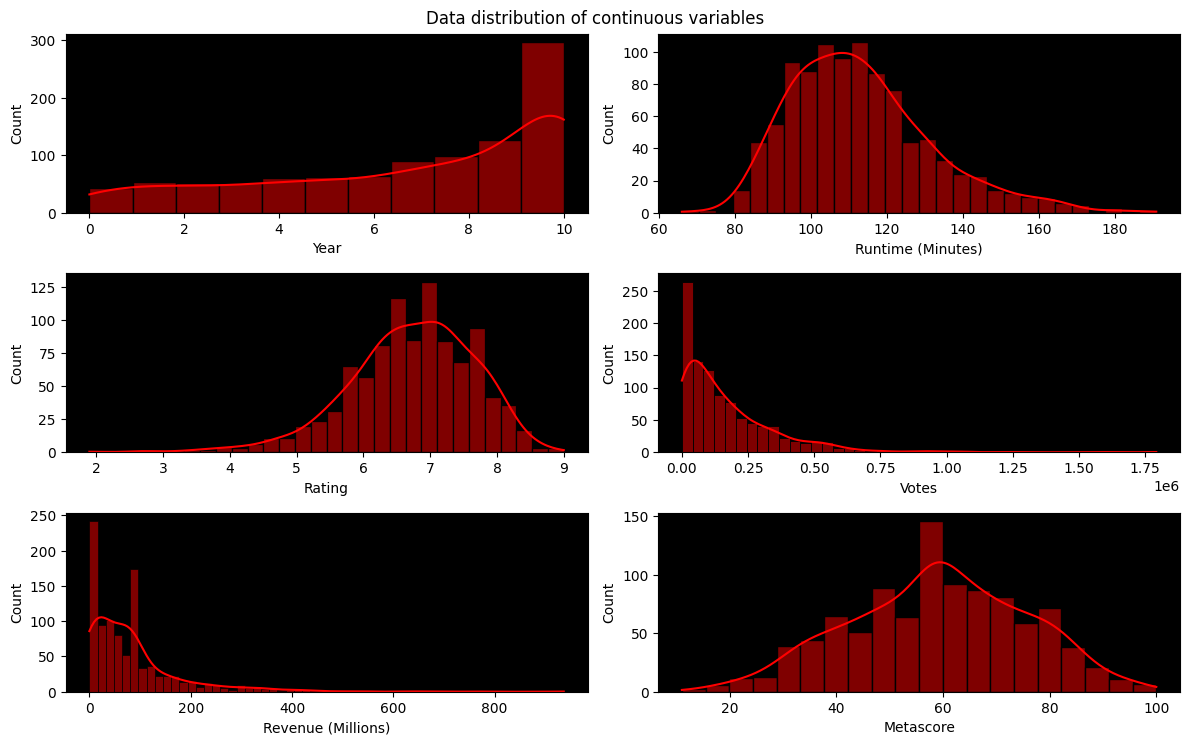

In [30]:
plt.figure(figsize=(12, 12))
for i, col in enumerate(dataset.select_dtypes(include=['float64','int64']).columns):
    plt.rcParams['axes.facecolor'] = 'black'
    ax = plt.subplot(5,2, i+1)
    sns.histplot(data=dataset, x=col, ax=ax,color='red',kde=True)
plt.suptitle('Data distribution of continuous variables')
plt.tight_layout()

# Power Transformation

In [31]:
#selecting variables that have data types float and int.
var=list(dataset.select_dtypes(include=['float64','int64']).columns)
var

['Year',
 'Runtime (Minutes)',
 'Rating',
 'Votes',
 'Revenue (Millions)',
 'Metascore']

In [32]:
from sklearn.preprocessing import PowerTransformer
sc_X=PowerTransformer(method = 'yeo-johnson')
dataset[var]=sc_X.fit_transform(dataset[var])


# Data distribution after Power Transformation

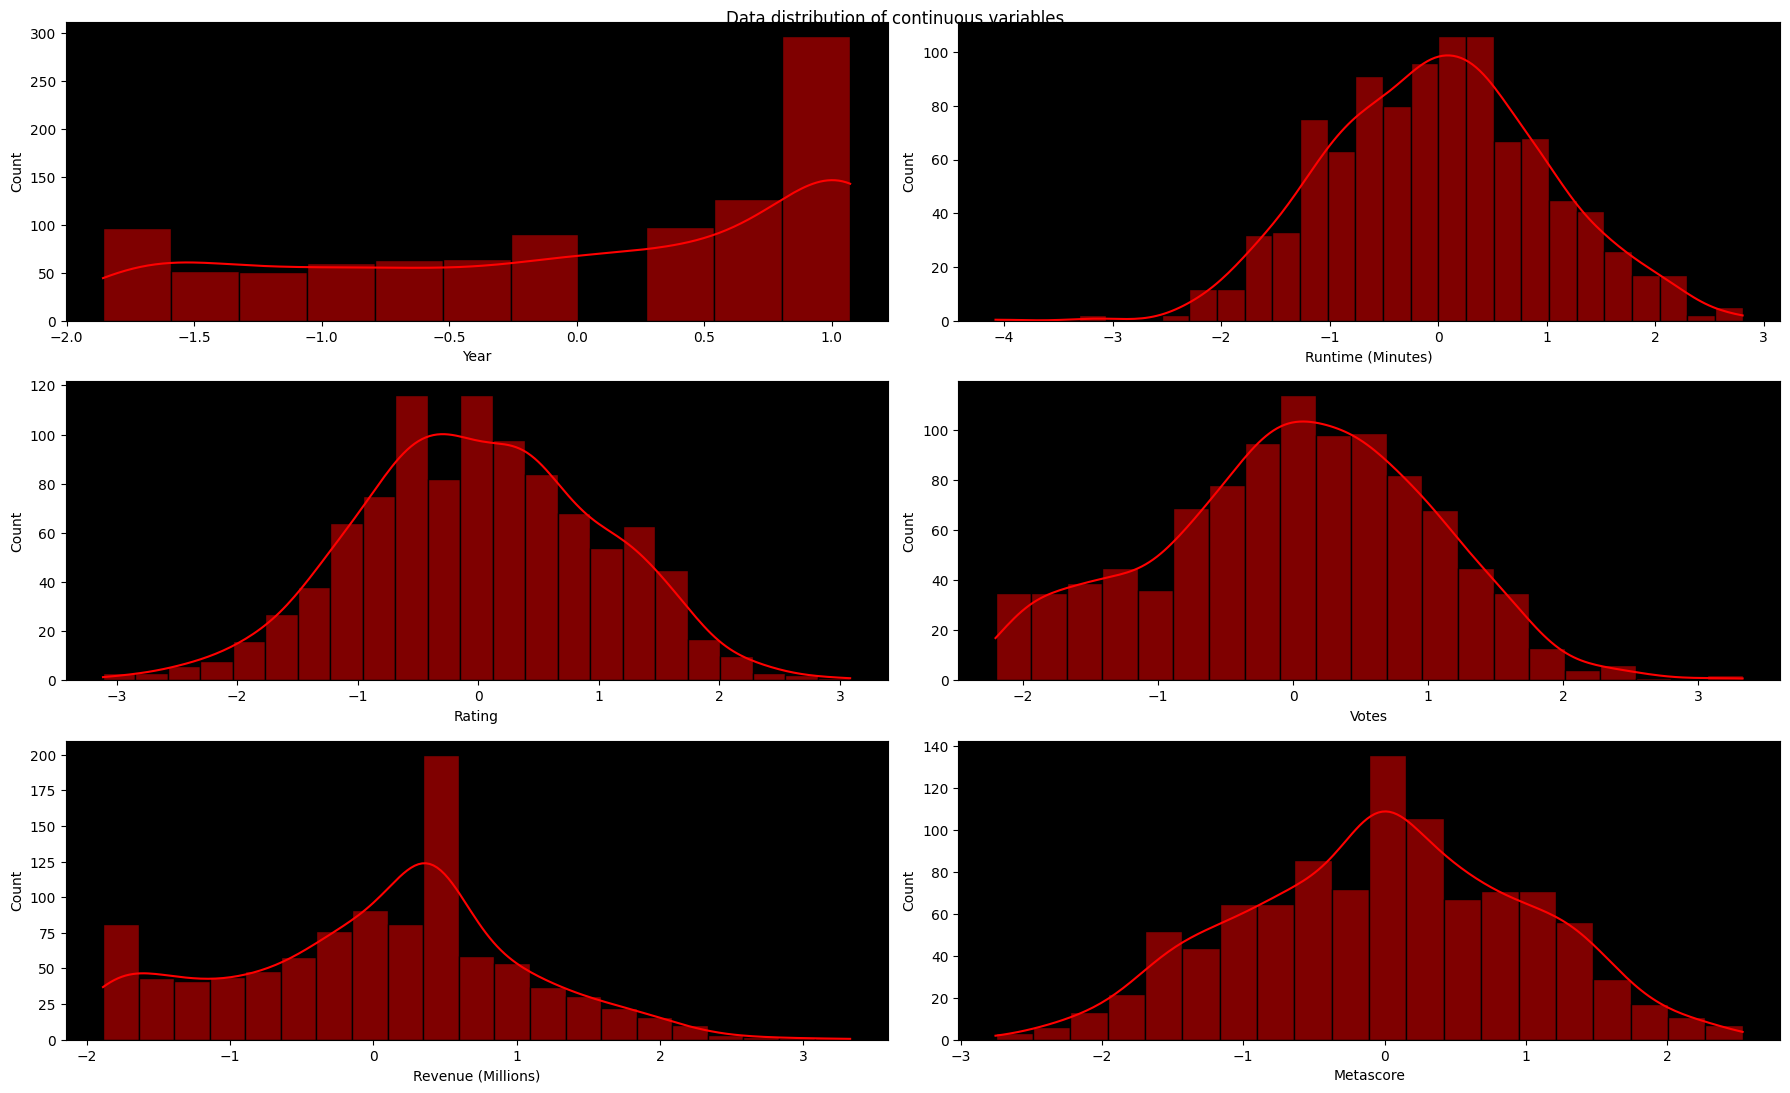

In [33]:
plt.figure(figsize=(18, 18))
for i, col in enumerate(dataset.select_dtypes(include=['float64','int64']).columns):
    plt.rcParams['axes.facecolor'] = 'black'
    ax = plt.subplot(5,2, i+1)
    sns.histplot(data=dataset, x=col, ax=ax,color='red',kde=True)
plt.suptitle('Data distribution of continuous variables')
plt.tight_layout()

## Splitting the dataset into X , Y

In [34]:
X=dataset.drop('Revenue (Millions)', axis=1)
y=dataset['Revenue (Millions)']

# Check for Multicollinearity

# Variance inflation factor(VIF) detects multicollinearity

In [35]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

calc_vif(X.select_dtypes(include=['float','int']))

,variables,VIF
0,Year,1.482667
1,Runtime (Minutes),1.304185
2,Rating,2.286620
3,Votes,2.130792
4,Metascore,1.663192


# Feature selection

In [36]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression #Correlation
fs = SelectKBest(score_func=f_regression, k='all')
fs.fit(X, y)
feature_contribution=(fs.scores_/sum(fs.scores_))*100


# Feature importance Graph 


Year : 4.64%
Runtime (Minutes) : 6.97%
Rating : 2.73%
Votes : 58.37%
Metascore : 0.32%
Genre_Adventure : 1.14%
Genre_Animation : 8.48%
Genre_Biography : 0.80%
Genre_Comedy : 2.19%
Genre_Crime : 1.12%
Genre_Drama : 9.91%
Genre_Fantasy : 0.06%
Genre_Horror : 0.63%
Genre_Mystery : 0.04%
Genre_Romance : 0.03%
Genre_Sci-Fi : 0.00%
Genre_Thriller : 0.06%
Rating_Category_Good : 2.51%


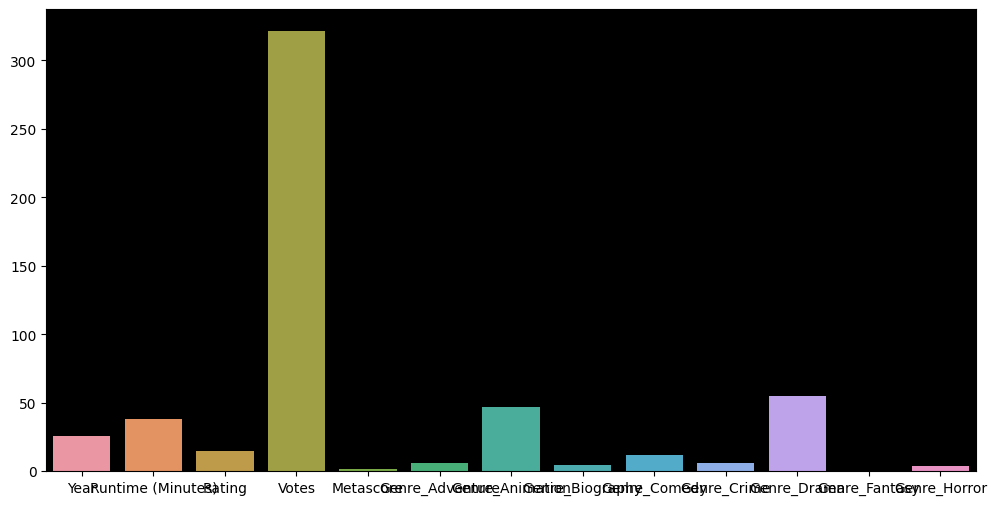

In [37]:
for i,j in enumerate(X.columns):
    print(f'{j} : {feature_contribution[i]:.2f}%')
# Select the first 13 columns of X and get their names
cols = list(X.columns[:13])

# Get the corresponding feature scores
scores = fs.scores_[:13]

# Plot the feature scores as a barplot
plt.figure(figsize=(12,6))
sns.barplot(x=cols, y=scores)
plt.show()


# Splitting our dataset into train and test set ¶


In [38]:
from sklearn.model_selection import train_test_split
#splitting our dataset in 80% training and 20% testset
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)


# Feature Scaling 


In [39]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

# **Building the models**

In [40]:
#importing different Regression models
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.model_selection import cross_val_score

# Xgboost Model

In [41]:
from xgboost import XGBRegressor


model = XGBRegressor(n_estimators=100, learning_rate=0.25, max_depth=3 )
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(f"Model R-Square: {r2_score(y_test, y_pred)*100:.2f}%")
print(f"Model MSE: {mean_squared_error(y_test, y_pred)*100:.2f}%")

accuracies = cross_val_score(estimator=model, X=X_train, y=y_train, cv=10, n_jobs=-1)
print("Cross Val Accuracy: {:.2f} %".format(accuracies.max()*100))
print("Cross Val Standard Deviation: {:.2f} %".format(accuracies.std()*100))


Model R-Square: 52.72%
Model MSE: 51.30%


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Cross Val Accuracy: 67.47 %
Cross Val Standard Deviation: 17.29 %


# Graph for XGBoost to see Actual vs Predicted 

In [42]:
import plotly.graph_objs as go

# Predict on test set
y_pred = model.predict(X_test)

# Create scatter plot of actual vs predicted values
fig = go.Figure()
fig.add_trace(go.Scatter(x=y_test, y=y_pred, mode='markers', name='Actual vs Predicted'))

# Add line of perfect prediction
fig.add_trace(go.Scatter(x=[y_test.min(), y_test.max()], y=[y_test.min(), y_test.max()],
                    mode='lines', name='Perfect Prediction'))

# Set x and y axis labels
fig.update_layout(xaxis_title='Actual Values', yaxis_title='Predicted Values',
                  title='Actual vs Predicted Values (XGBoost Regressor)')

# Show the plot
fig.show()


# Feature importances Graph for XGBoost model

In [43]:
import plotly.express as px

feature_importance = model.feature_importances_
sorted_idx = feature_importance.argsort()
features = X.columns[sorted_idx]
feature_importance = feature_importance[sorted_idx]

fig = px.bar(x=feature_importance, y=features, orientation='h')
fig.update_layout(title='Feature Importance of (XGBoost Regressor) Model')
fig.show()


# **Random Forest Regressor**

In [44]:
model=RandomForestRegressor(n_estimators=100,random_state=42)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print(f"Model R-Square : {r2_score(y_test,y_pred)*100:.2f}%")
print(f"Model MSE : {mean_squared_error(y_test,y_pred)*100:.2f}%")
accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 5)
print("Cross Val Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Cross Val Standard Deviation: {:.2f} %".format(accuracies.std()*100))


Model R-Square : 51.77%
Model MSE : 52.33%
Cross Val Accuracy: 42.93 %
Cross Val Standard Deviation: 5.65 %


# Graph for Random Forest Regressor to see Actual vs Predicted 

In [45]:
import plotly.graph_objs as go

# Predict on test set
y_pred = model.predict(X_test)

# Create scatter plot of actual vs predicted values
fig = go.Figure()
fig.add_trace(go.Scatter(x=y_test, y=y_pred, mode='markers', name='Actual vs Predicted'))

# Add line of perfect prediction
fig.add_trace(go.Scatter(x=[y_test.min(), y_test.max()], y=[y_test.min(), y_test.max()],
                    mode='lines', name='Perfect Prediction'))

# Set x and y axis labels
fig.update_layout(xaxis_title='Actual Values', yaxis_title='Predicted Values',
                  title='Actual vs Predicted Values (Random Forest Regressor)')

# Show the plot
fig.show()


# Feature importances Graph for Random Forest Model model

In [46]:
import plotly.express as px

feature_importance = model.feature_importances_
sorted_idx = feature_importance.argsort()
features = X.columns[sorted_idx]
feature_importance = feature_importance[sorted_idx]

fig = px.bar(x=feature_importance, y=features, orientation='h')
fig.update_layout(title='Feature Importance of Random Forest Model')
fig.show()


# Tree graph of Random Forest Model

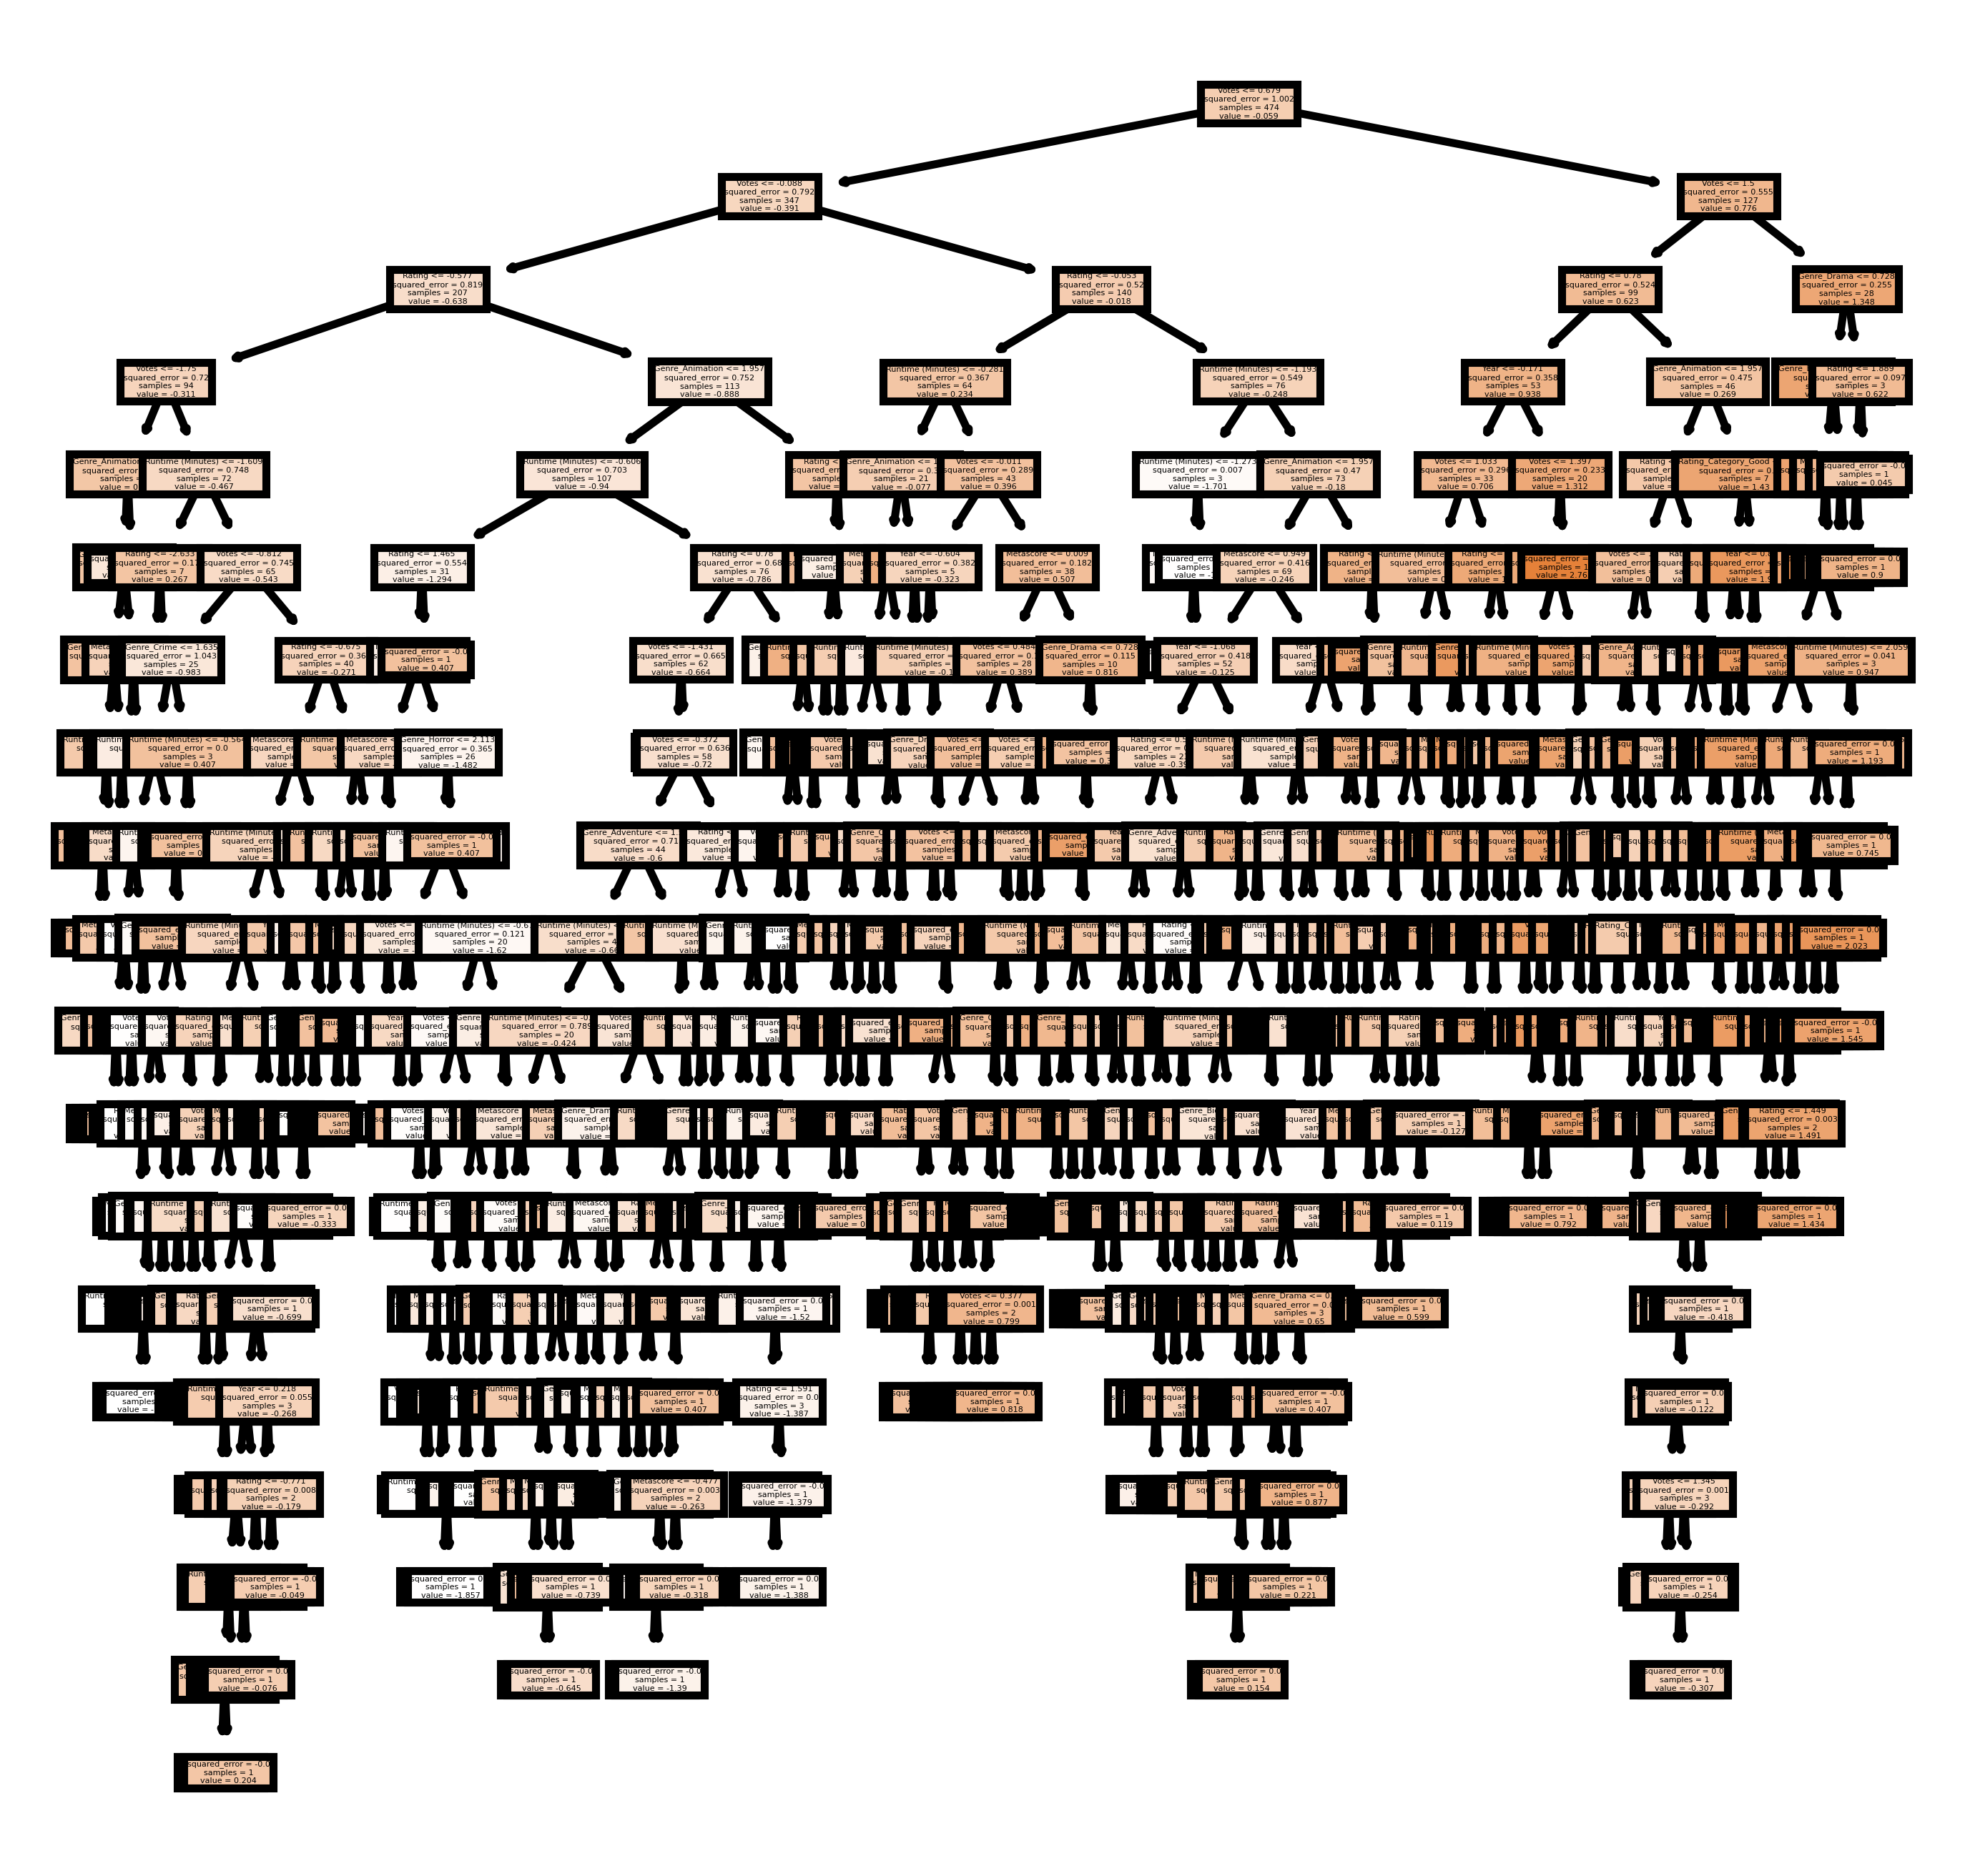

In [47]:
from sklearn import tree

fn=X.columns
cn=y
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(model.estimators_[0],
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('rf_individualtree.png')